 # <center>  LAB5 - Aproksymacja </center>
# <center>  Gosztyła Mikołaj, Smółka Antoni </center> 

## Zadanie 1. 
Wykonaj aproksymację średniokwadratową punktową populacji Stanów Zjednoczonych w przedziale [1900,1980] wielomianami stopnia m dla 0 ≤ m ≤ 6.

### (a)
Dla każdego m dokonaj ekstrapolacji wielomianu do roku 1990. Porównaj otrzymaną wartość z prawdziwą wartością dla roku 1990, wynoszącą 248 709 873. Ile wynosi błąd względny ekstrapolacji dla roku 1990? Dla jakiego m błąd względny był najmniejszy?

### (b)
Zbyt niski stopień wielomianu oznacza, że model nie jest w stanie uwzględnić zmienności danych (duże obciążenie). Zbyt wysoki stopień wielomianu oznacza z kolei, że model uwzględnia szum lub błędy danych (duża wariancja), co w szczególności obserwowaliśmy w przypadku interpolacji. Wielomian stopnia m posiada k = m + 1 parametrów. Stopień wielomianu, m, jest hiperparametrem modelu. Do wyboru optymalnego stopnia wielomianu można posłużyć się kryterium informacyjnym Akaikego (ang. Akaike information criterion):


$ AIC = 2k + n ln((∑(i=1)^n[yi − ŷ(xi)]^2)/n) $


gdzie yi (i = 1, . . . , n) oznacza prawdziwą liczbę osób w roku xi, natomiast ŷ(xi) liczbę osób przewidywaną przez model, tzn wartość wielomianu ŷ(x).

Ponieważ rozmiar próbki jest niewielki (dane z dziewięciu lat, n = 9), n/k < 40, należy użyć wzoru ze składnikiem korygującym:


$ AICc = AIC + 2k(k + 1)/(n− k − 1). $

Mniejsze wartości kryterium oznaczają lepszy model. Czy wyznaczony w ten sposób stopień m, odpowiadający najmniejszej wartości AICc, pokrywa się z wartością z poprzedniego podpunktu?

## Zadanie 2.
Wykonaj aproksymację średniokwadratową ciągłą funkcji $ f(x) = √x $ w przedziale [0,2] wielomianem drugiego stopnia, używając wielomianów Czebyszewa. Aproksymacja ta jest tańszym obliczeniowo zamiennikiem aproksymacji jednostajnej.

## Literatura

1. Xin-She Yang, Introduction to Algorithms for Data Mining and Machine Learning, 2019.

---

In [1]:
import numpy as np
from numpy.polynomial import Polynomial
from numpy.polynomial import Chebyshev
import matplotlib.pyplot as plt

## Zadanie 1.

In [2]:
years = np.arange(1900, 1981)
population = np.array([76094000, 77584000, 79163000, 80632000, 82166000, 83822000, 85845000, 87008000, 88710000, 90490000,
                       92407000, 93863000, 95335000, 97112000, 98829000, 100546000, 101961000, 103268000, 103208000,
                       104514000, 106461000, 108538000, 110049000, 111947000, 114109000, 115829000, 117397000, 119035000,
                       120509000, 121767000, 123076741, 124039648, 124840471, 125578763, 126373773, 127250232, 128053180,
                       128824829, 129824939, 130879718, 132122446, 133402471, 134859553, 136739353, 138397345, 139928165,
                       141388566, 144126071, 146631302, 149188130, 152271417, 154877889, 157552740, 160184192, 163025854,
                       165931202, 168903031, 171984130, 174881904, 177829628, 180671158, 183691481, 186537737, 189241798,
                       191888791, 194302963, 196560338, 198712056, 200706052, 202676946, 205052174, 207660677, 209896021,
                       211908788, 213853928, 215973199, 218035164, 220239425, 222584545, 225055487, 227224681])

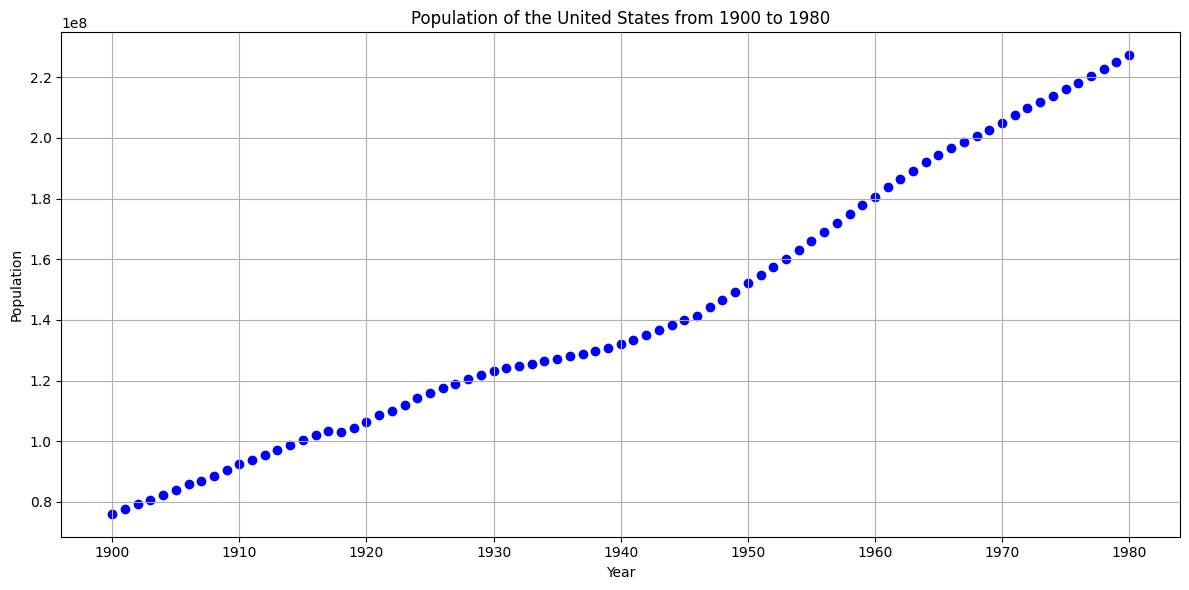

In [3]:
plt.figure(figsize=(12, 6))
plt.scatter(years, population, color='blue', marker='o')
plt.title('Population of the United States from 1900 to 1980')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

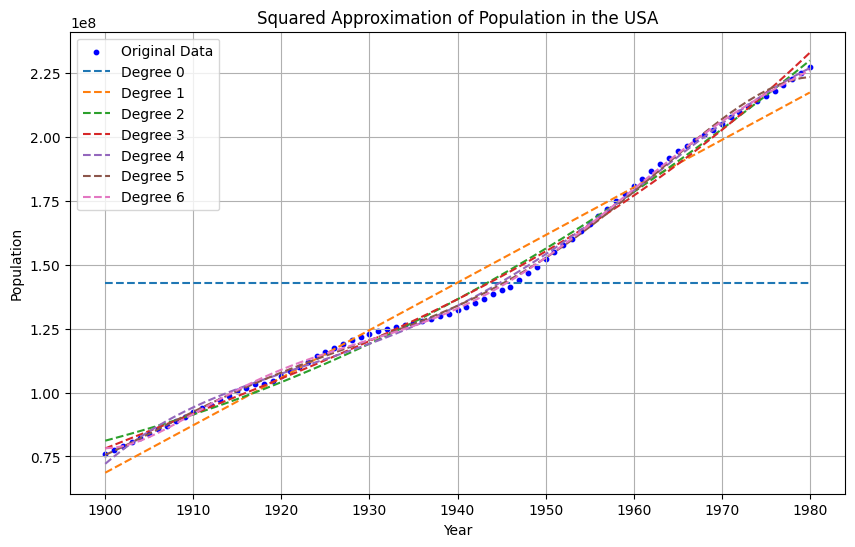

In [4]:
degrees = range(7)
years_adjusted = years - 1900

plt.figure(figsize=(10, 6))
plt.scatter(years, population, label='Original Data', color='blue', s=10)

all_coeffs = [[] for _ in degrees]
all_predictions = [[] for _ in degrees]
for m in degrees:
    X = np.column_stack([years_adjusted**i for i in range(m + 1)])
    coeffs, _, _, _ = np.linalg.lstsq(X, population, rcond=None)
    predicted_population = X @ coeffs
    plt.plot(years, predicted_population, label=f'Degree {m}', linestyle='--')
    all_coeffs[m] = coeffs
    all_predictions[m] = predicted_population

plt.title('Squared Approximation of Population in the USA')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

## a)

In [5]:
true_value_1990 = 248709873

min_relative_error = float('inf')
best_degree = -1
print("True value of population in 1990: ", end = "")
print(true_value_1990)

for m in degrees:
    coeffs = all_coeffs[m]
    predicted_population_1990 = 0
    it = 0
    for coeff in coeffs:
        predicted_population_1990 += (1990 - 1900) ** it * coeff
        it += 1
        
    relative_error = abs(predicted_population_1990 - true_value_1990) / true_value_1990
    
    print(f"For m = {m}, predicted population is: {predicted_population_1990}")
    print(f"Relative error: {relative_error}\n")
    
    if relative_error < min_relative_error:
        min_relative_error = relative_error
        best_degree = m

print("Minimum relative error:", min_relative_error)
print("Degree with the smallest relative error:", best_degree)

True value of population in 1990: 248709873
For m = 0, predicted population is: 143007890.02469137
Relative error: 0.4250011537551974

For m = 1, predicted population is: 235951457.8194068
Relative error: 0.051298386456066394

For m = 2, predicted population is: 259186926.75758642
Relative error: 0.042125604549628874

For m = 3, predicted population is: 268498813.821987
Relative error: 0.07956636615703219

For m = 4, predicted population is: 235575481.29161596
Relative error: 0.05281009374478687

For m = 5, predicted population is: 200084156.92326498
Relative error: 0.1955118045383547

For m = 6, predicted population is: 251555006.5079279
Relative error: 0.011439568013964185

Minimum relative error: 0.011439568013964185
Degree with the smallest relative error: 6


## b)

In [6]:
best_degree = -1
min_AICc = float('inf')

for m in degrees:
    coeffs = all_coeffs[m]
    predicted_population = all_predictions[m]
    
    # Calculate the AICc
    k = m + 1
    n = len(population)
    AIC = 2*k + n*np.log(np.sum((population - predicted_population) ** 2) / n)
    AICc = AIC + (2*k*(k + 1)) / (n - k - 1)

    if AICc < min_AICc:
        min_AICc = AICc
        best_degree = m

print("Best degree:", best_degree)
print("Minimum AICc:", min_AICc)

Best degree: 6
Minimum AICc: 2288.705094289584


## Zadanie 2

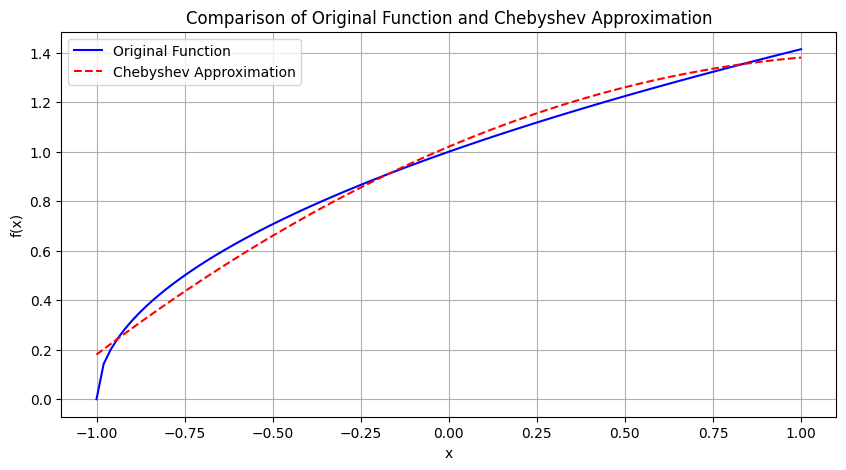

In [11]:
import numpy as np
from scipy.integrate import quad

# Przeskalowanie funkcji f(x) = sqrt(x) do przedziału [-1, 1]
def rescale(x):
    return (x + 1)
# Przeskalowana funkcja f(x) w nowym przedziale [-1, 1]
def f_rescaled(x):
    return np.sqrt(rescale(x))

# Funkcja wagi dla wielomianów Czebyszewa na przedziale [-1,1]
def weight_function(x):
    return (1 - x**2)**(-1/2)

# Obliczenie współczynników przy użyciu iloczynu skalarnego dla wielomianów Czebyszewa
def chebyshev_coefficient(f, n):
    # Anonimowa funkcja dla n-tego wielomianu Czebyszewa i funkcji f(x)
    integrand = lambda x: f(x) * np.cos(n * np.arccos(x)) * weight_function(x)
    # Współczynnik a_n jest 2/pi-krotnością całki, z wyjątkiem a_0, gdzie jest to 1/pi
    coefficient = (2 / np.pi) * quad(integrand, -1, 1)[0] if n > 0 else (1 / np.pi) * quad(integrand, -1, 1)[0]
    return coefficient

def approximated_function(x):
    return a0 + a1 * np.cos(np.arccos(x)) + a2 * np.cos(2 * np.arccos(x))

# Obliczenie pierwszych trzech współczynników dla aproksymacji wielomianem drugiego stopnia
a0 = chebyshev_coefficient(f_rescaled, 0)
a1 = chebyshev_coefficient(f_rescaled, 1)
a2 = chebyshev_coefficient(f_rescaled, 2)

x_values = np.linspace(-1, 1, 100)
y_true = f_rescaled(x_values)
y_approx = approximated_function(x_values)

# Współczynniki aproksymacji
a0, a1, a2



# Rysowanie wykresu
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_true, label='Original Function', color='blue')
plt.plot(x_values, y_approx, label='Chebyshev Approximation', color='red', linestyle='--')
plt.title('Comparison of Original Function and Chebyshev Approximation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()


